In [5]:
import os

# Define dataset directories
dataset_path = r"D:\Dataset for objectdetection"  # Update with your dataset location
train_path = os.path.join(dataset_path, "train")
valid_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

# Check if directories exist
print("Train Folder:", os.path.exists(train_path))
print("Valid Folder:", os.path.exists(valid_path))
print("Test Folder:", os.path.exists(test_path))


Train Folder: True
Valid Folder: True
Test Folder: True


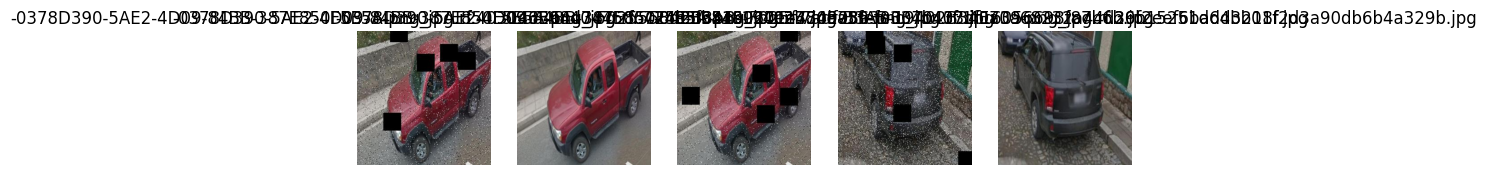

In [6]:
import cv2
import matplotlib.pyplot as plt

# List some sample images from the train directory
sample_images = os.listdir(train_path)[:5]  # Get first 5 images

# Display images
plt.figure(figsize=(10,5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(train_path, img_name)
    image = cv2.imread(img_path)  # Read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(img_name)

plt.show()


In [7]:
import json

# Load the COCO annotations file
annotation_path = os.path.join(train_path, "_annotations.coco.json")  # Adjust based on actual annotation file name
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

# Print sample annotation details
print(json.dumps(annotations, indent=4)[:1000])  # Show first 1000 characters


{
    "info": {
        "year": "2024",
        "version": "4",
        "description": "Exported from roboflow.com",
        "contributor": "",
        "url": "https://public.roboflow.com/object-detection/undefined",
        "date_created": "2024-02-06T15:35:56+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "https://creativecommons.org/licenses/by/4.0/",
            "name": "CC BY 4.0"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "cars-bikes-people",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "Bus",
            "supercategory": "cars-bikes-people"
        },
        {
            "id": 2,
            "name": "Bushes",
            "supercategory": "cars-bikes-people"
        },
        {
            "id": 3,
            "name": "Person",
            "supercategory": "cars-bikes-people"
        },
        {
            "id": 4,
            "name": "Truck",


In [8]:
import json
import os
import cv2

# Load the COCO annotations file
annotation_path = os.path.join(train_path, "_annotations.coco.json")  # Adjust path
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

# Create a mapping from category ID to label name
category_map = {category['id']: category['name'] for category in annotations['categories']}

# Create a dictionary mapping image ID to filename
image_map = {image['id']: image['file_name'] for image in annotations['images']}

# Extract bounding boxes for each image
image_annotations = {}
for ann in annotations['annotations']:
    image_id = ann['image_id']
    bbox = ann['bbox']  # Format: [x_min, y_min, width, height]
    label = category_map[ann['category_id']]  # Get object name
    
    if image_id not in image_annotations:
        image_annotations[image_id] = []
    
    image_annotations[image_id].append({"bbox": bbox, "label": label})

# Print example annotation
example_image_id = list(image_annotations.keys())[0]
print(f"Image: {image_map[example_image_id]}")
print("Bounding Boxes & Labels:", image_annotations[example_image_id])


Image: 15103310083_e6cb39844c_o_jpg.rf.fb4b2ea34fd7128dc8390fab5df0fa71.jpg
Bounding Boxes & Labels: [{'bbox': [91, 76, 120.5, 115.5], 'label': 'rat'}]


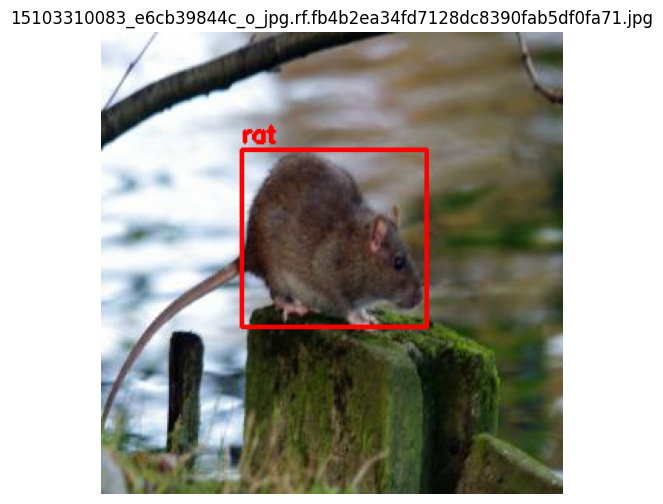

In [9]:
import matplotlib.pyplot as plt

# Select an image to visualize
image_id = example_image_id
image_name = image_map[image_id]
image_path = os.path.join(train_path, image_name)

# Load image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get annotations
for obj in image_annotations[image_id]:
    x, y, w, h = obj['bbox']  # COCO format: [x_min, y_min, width, height]
    label = obj['label']
    
    # Draw bounding box
    cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)
    cv2.putText(image, label, (int(x), int(y-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display image with bounding boxes
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.title(image_name)
plt.show()
